# Movie Rating Prediction With Python
* Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
* The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
* Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.


---


Dataset: [dataset.csv](https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies)


---


Submitted By: Nishchal Kansara<br>
Data Science (Intern)<br>
Batch: December A91<br>
Submitted To: CodSoft


---



# Loading and Exploring the Dataset

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Data Science/CodSoft (Internship)/movie_rating_prediction_with_python/dataset.csv'

df = pd.read_csv(path, encoding='latin1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
rows, cols = df.shape
print(f"rows={rows} and cols={cols}")

rows=15509 and cols=10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.duplicated().sum()

6

# Data Cleaning

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
rows, cols = df.shape
print(f"rows={rows} and cols={cols}")

rows=5659 and cols=10


# Data Pre-Processing

In [ ]:
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(int)
df['Votes'] = df['Votes'].str.extract(r'(\d+)').astype(int)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))

In [ ]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
df.duplicated().sum()

0

# Data Visualization

## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Movie Releases Over the Years

In [ ]:
year_counts = df['Year'].value_counts().sort_index()
year_df = pd.DataFrame({'Year': year_counts.index, 'Count': year_counts.values})

area_chart = px.area(
    year_df,
    x='Year',
    y='Count',
    title="Movie Releases Over the Years",
    labels={'Year': 'Year of Release', 'Count': 'Number of Movies Released'}
)

area_chart.update_traces(line_color='blue', fillcolor='rgba(173, 216, 230, 0.5)')
area_chart.update_layout(
    title={
        'text': "Movie Releases Over the Years",
        'x': 0.5,
        'xanchor': 'center'
    }
)

area_chart.show()

In [ ]:
scatter_plot = px.scatter(
    year_df,
    x='Year',
    y='Count',
    title="Movie Releases Over the Years",
    labels={'Year': 'Year of Release', 'Count': 'Number of Movies Released'},
    trendline="lowess"
)

scatter_plot.update_traces(
    marker=dict(color='lightblue'),
    line=dict(color='blue')
)
scatter_plot.update_layout(
    title={
        'text': "Movie Releases Over the Years",
        'x': 0.5,
        'xanchor': 'center'
    }
)

scatter_plot.show()

## Number of Movies Released by Year

In [ ]:
bar_chart = px.bar(
    year_df,
    x='Year',
    y='Count',
    title="Number of Movies Released by Year",
    labels={'Year': 'Year of Release', 'Count': 'Number of Movies Released'},
    text='Count'
)

bar_chart.update_traces(marker_color='pink', textposition='outside')
bar_chart.update_layout(
    title={
        'text': "Number of Movies Released by Year",
        'x': 0.5,
        'xanchor': 'center'
    }
)

bar_chart.show()

## Number of Movies by Genre

In [ ]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

genre_chart = px.bar(
    genre_counts,
    x='Genre',
    y='Count',
    title="Number of Movies by Genre",
    labels={'Genre': 'Genre', 'Count': 'Number of Movies'},
    text='Count'
)

genre_chart.update_traces(
    marker_color='lightblue',
    texttemplate='%{text}',
    textposition='outside',
    hovertemplate='Genre: %{x}<br>Number of Movies: %{y}'
)

genre_chart.update_layout(
    title={
        'text': "Number of Movies by Genre",
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_tickangle=-90
)

genre_chart.show()

## Distribution of Movie Ratings

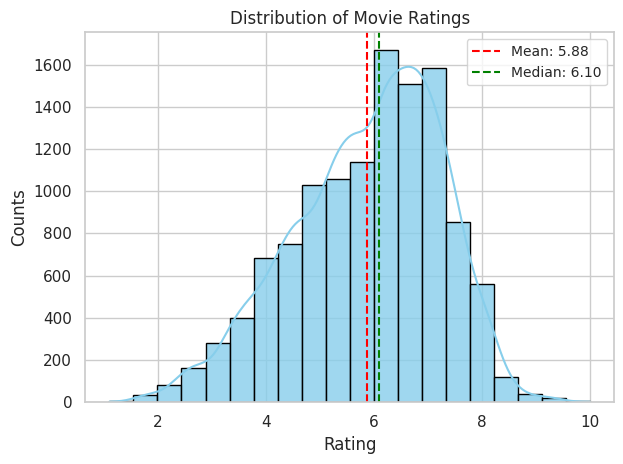

In [ ]:
sns.set_theme(style="whitegrid")

sns.histplot(
    df['Rating'], kde=True, bins=20, color='skyblue',
    edgecolor='black', alpha=0.8
)

mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
plt.axvline(mean_rating, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_rating:.2f}')
plt.axvline(median_rating, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_rating:.2f}')

plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.legend(fontsize=10)
plt.tight_layout()

plt.show()

## Average Movie Rating by Genre

In [ ]:
avg_rating_by_genre = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).reset_index()

genre_chart = px.bar(
    avg_rating_by_genre,
    x='Genre',
    y='Rating',
    title="Average Movie Rating by Genre",
    labels={'Genre': 'Genre', 'Rating': 'Average Rating'},
    text='Rating'
)

genre_chart.update_traces(
    marker_color='lightblue',
    texttemplate='%{text:.2f}',
    textposition='outside',
    hovertemplate='Genre: %{x}<br>Average Rating: %{y:.2f}'
)

genre_chart.update_layout(
    title={
        'text': "Average Movie Rating by Genre",
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_tickangle=-90
)

genre_chart.show()

# Import Necessary Libraries for Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Feature Engineering

In [ ]:
df.drop('Name', axis=1, inplace=True)

genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

X = df[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_lr_pred = lr_model.predict(X_test)

print("Linear Regression:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_lr_pred) * 100:.2f}%")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_lr_pred)* 100:.2f}%")
print(f"R-squared: {r2_score(y_test, y_lr_pred)* 100:.2f}%")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

print("\nRandom Forest Regressor:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_rf_pred)* 100:.2f}%")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_rf_pred)* 100:.2f}%")
print(f"R-squared: {r2_score(y_test, y_rf_pred)* 100:.2f}%")

Linear Regression:
Mean Absolute Error (MAE): 49.64%
Mean Squared Error (MSE): 45.30%
R-squared: 76.07%

Random Forest Regressor:
Mean Absolute Error (MAE): 17.92%
Mean Squared Error (MSE): 9.53%
R-squared: 94.97%


# Model Performance

## Model Performance Comparison

<Figure size 1200x600 with 0 Axes>

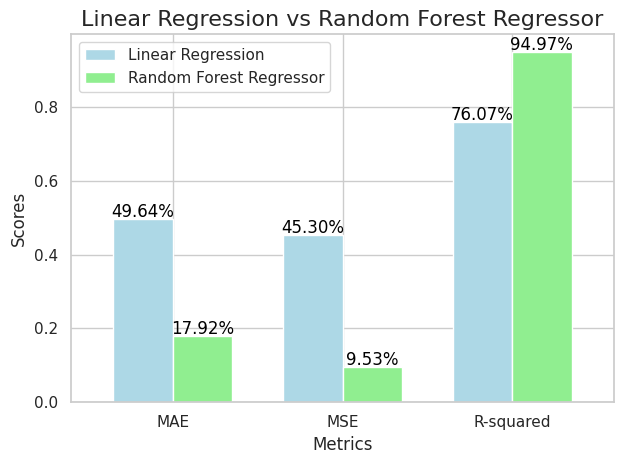

In [ ]:
mae_lr = mean_absolute_error(y_test, y_lr_pred)
mse_lr = mean_squared_error(y_test, y_lr_pred)
r2_lr = r2_score(y_test, y_lr_pred)

mae_rf = mean_absolute_error(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

model_comparison = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R-squared'],
    'Linear Regression': [mae_lr, mse_lr, r2_lr],
    'Random Forest Regressor': [mae_rf, mse_rf, r2_rf]
})

plt.figure(figsize=(12, 6))
ax = model_comparison.set_index('Metric').plot(kind='bar', color=['lightblue', 'lightgreen'], width=0.7)

for p in ax.patches:
    percentage = p.get_height() * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Linear Regression vs Random Forest Regressor", fontsize=16)
plt.ylabel('Scores')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

## Summary with Conclusion

In [ ]:
model_performance = {
    'Model': ['Linear Regression', 'Random Forest Regressor'],
    'MAE': [mae_lr * 100, mae_rf * 100],
    'MSE': [mse_lr * 100, mse_rf * 100],
    'R-squared': [r2_lr * 100, r2_rf * 100],
}

performance_df = pd.DataFrame(model_performance)

performance_df['R-squared'] = performance_df['R-squared'].apply(lambda x: f"{x:.2f}%")
performance_df['MAE'] = performance_df['MAE'].apply(lambda x: f"{x:.2f}%")
performance_df['MSE'] = performance_df['MSE'].apply(lambda x: f"{x:.2f}%")

print("Model Performance Summary:")
print(performance_df)

if mae_lr < mae_rf and mse_lr < mse_rf and r2_lr > r2_rf:
    conclusion = "Linear Regression performs better with lower error and higher R-squared."
elif mae_rf < mae_lr and mse_rf < mse_lr and r2_rf > r2_lr:
    conclusion = "Random Forest Regressor performs better with lower error and higher R-squared."
else:
    conclusion = "Both models perform similarly with small differences in metrics."

print("\nConclusion:", conclusion)

Model Performance Summary:
                     Model     MAE     MSE R-squared
0        Linear Regression  49.64%  45.30%    76.07%
1  Random Forest Regressor  17.92%   9.53%    94.97%

Conclusion: Random Forest Regressor performs better with lower error and higher R-squared.


# Model Testing

In [ ]:
X.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.056744,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.751042,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.811087,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.751042,5.335135,4.793617,5.73,5.93
5,1997,827,147,6.056744,5.335135,4.793617,5.73,5.93


In [ ]:
y.head(5)

,Rating
1,7.0
3,4.4
3,4.4
5,4.7
5,4.7


In [ ]:
data = {'Year': [2021], 'Votes': [30], 'Duration': [145], 'Genre_mean_rating': [5.8], 'Director_encoded': [5.3], 'Actor1_encoded': [5.2], 'Actor2_encoded': [5.7], 'Actor3_encoded': [4.4]}
trail = pd.DataFrame(data)

lr_rating_predicted = lr_model.predict(trail)
rf_rating_predicted = rf_model.predict(trail)

print(f"Predicted Rating (Linear Regression): {lr_rating_predicted[0]:.2f}")
print(f"Predicted Rating (Random Forest Regressor): {rf_rating_predicted[0]:.2f}")

Predicted Rating (Linear Regression): 4.98
Predicted Rating (Random Forest Regressor): 4.84
